# ARIM情報活用講座：　ケモインフォマテックス 
# 海洋性生分解性ポリマー編

## MOESM5_ESMデータセット
MOESM5_ESM data setは、ペンシルバニア州立大学Robert T. Mathers教授らの論文[1]で公開されている文献のSupplementary informationにある海洋性生分解性ポリマーのデータセット（41467_2020_14538_MOESM5_ESM.xlsx）です。ポリマーの種類、形状、物性、および分解実験データがまとめられています。

ポリマーの種類としては、直鎖、分岐、環状の構造を持つポリエステル、ポリアセタール、ポリアクリルアミド、PC、ポリエーテル、PE、PP、ポリシロキサン、PS、PU、PVCを含む110種類以上のポリマーについて調査され、ここに含まれるプラスチックは、市販のサンプルと実験室で作られたものです。

また、これらはクラス（ポリマーのタイプ）、試料（フィルム、パウダー）、物理的属性（質量、体積、表面対体積比）、実験パラメーター（海水中での時間、温度）によって分類されています。また、海水にさらされた際の重量減少や、生物学的・生物学的条件も記録されています。

さらに、分子レベルの記述子とバルクポリマー記述子によって、各ポリマーを区別しており、バルク特性記述子には、密度、重量平均分子量(Mw)、数平均分子量(Mn)、分散度(Mw/Mn)、Tg、融解温度(Tm)、結晶化度、融解エンタルピー(すなわち、必要なエネルギー量(J g-1))が含まれています。

分子レベルの記述子には、ハイブリダイゼーション（sp3、sp2）の概念を用いた炭素、酸素、窒素原子の種類と、ポリマー中のこれらの原子の割合が含まれています。分子レベルの構造的特徴を捉えるために、データベースはモノマーあたりの水素の数、モノマーあたりのCH3、CH2、CH基の数、環状環の数、環状環に含まれる原子の割合が示されています。

また、各ポリマーの油状または撥水性を連続的に定量化するために、疎水性と呼ばれる概念を検討されています。

![altメインイメージ](./img/image.png)

---
[1] Kyungjun Min, Joseph D. Cuiffi & Robert T. Mathers　"Ranking environmental degradation trends of plastic marine debris based on physical properties　and molecular structure", NATURE COMMUNICATIONS. 11, Article number: 727 (2020) https://www.nature.com/articles/s41467-020-14538-z

---

【MOESM5_ESM変数一覧（特徴量）】

【性状/物理的記述子】
1. Number  	
1. Name  
1. shape  
1. thickness (cm)  	
1. L (cm)  
1. W (cm)  
1. SA (cm2)  
1. Vol (cm3)  
1. den (g mL-1)  
1. mass (g)  
1. SA/V (cm-1) 

【分子記述子】
1. total C in comonomer A  
1. total C in comonomer B  
1. % comonomer B  
1. CH in comonomer A  
1. CH in A+B  
1. CH2 in A  
1. CH2 in A+B  
1. CH3 in A+B  
1. total CH bonds A+B  
1. total N in A+B  
1. total O in A+B  
1. total C=O  
1. % C=O  
1. total sp3 C  
1. %sp3 C  
1. #rings  
1. %C in rings

【物性記述子】
1. LogP(SA)-1 (Å-2)  
1. Mw (kg mol-1)  
1. Mn (kg mol-1)  
1. Mw/Mn  
1. Tg (°C)  
1. Tm (°C)  
1. % cryst  
1. enthalpy (J g-1)  
1. (Tw-Tg)/(LogP/SA)  
1. Temp (°C)  
1. degrad. time (days)  
1. BOD (% day-1)  
1. wt. loss (% month-1)  
1. wt. loss (% day-1)  
1. wt. loss (mg cm-2 day-1)  
1. medium  
1. abiotic or biotic conditions  
1. 5 tier rank  
1. 3-tier rank  

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!git clone https://github.com/ARIM-Training/Training_python_5.git
%cd Training_python_5

## 1.分子構造データの読み込み
### 汎用ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import graphviz
import pydotplus

# 警告を無視
from warnings import filterwarnings
filterwarnings('ignore')

### データセットファイルの読み込み
「data」フォルダーにある41467_2020_14538_MOESM5_ESM.xlsxをpandasの`read_excel()`からデータフレーム（DataFrame）オブジェクトとして変数df_allに格納します。

dfは110のポリマーに対して46の特徴量からなるデータ行列となっていることが確かめられます。（46の特徴量のカラム名の意味は冒頭に記載してあります。なお、下記の読み込みでは、index_col=0として最初のNumberをindexとして割り付けます）

In [2]:
# read from master reduced excel file
df_all = pd.read_excel('data/41467_2020_14538_MOESM5_ESM.xlsx', index_col=0, header=0)
df_all
#pd.set_option('display.max_rows', 1000)
#df_all.columns

,Name,shape,thickness (cm),L (cm),W (cm),SA (cm2),Vol (cm3),den (g mL-1),mass (g),SA/V (cm-1),...,Temp (°C),degrad. time (days),BOD (% day-1),wt. loss (% month-1),wt. loss (% day-1),wt. loss (mg cm-2 day-1),medium,abiotic or biotic conditions,5 tier rank,3-tier rank
Number,,,,,,,,,,,,,,,,,,,,,
0,PBS,powder,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN,...,25.0,30,1.5,NaN,NaN,NaN,artificial seawater,b,very slow,slow
1,PBGl,powder,NaN,NaN,NaN,NaN,NaN,1.17,NaN,NaN,...,25.0,30,4.9,NaN,NaN,NaN,artificial seawater,b,medium,medium
2,PBAdip,powder,NaN,NaN,NaN,NaN,NaN,1.12,NaN,NaN,...,25.0,30,6.3,NaN,NaN,NaN,artificial seawater,b,fast,medium
3,PBPi,powder,NaN,NaN,NaN,NaN,NaN,1.10,NaN,NaN,...,25.0,30,5.5,NaN,NaN,NaN,artificial seawater,b,medium,medium
4,PBSub,powder,NaN,NaN,NaN,NaN,NaN,1.07,NaN,NaN,...,25.0,30,4.8,NaN,NaN,NaN,artificial seawater,b,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,30.0,240,NaN,39.000000,0.325000,0.020074,seawater/estuary,b,medium,medium
116,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,28.5,240,NaN,35.000000,0.291667,0.018015,seawater/estuary,b,medium,medium
117,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,28.0,240,NaN,29.000000,0.241667,0.014926,seawater/estuary,b,medium,medium


### カテゴリー変数のダミー変数化
上記の変数のうち海洋分解性の指標としている「5 tier rank」、「3-tier rank」は「順序尺度」を示す文字列型のカテゴリー変数となってります。このままでは機械可読ができません。

このような文字列型のカテゴリー変数は数値列のダミー変数に置換する必要があります。
以下では、'5 tier rank'および'3-tier rank'の二つのカテゴリー変数についてランキングを考慮したダミー変数へ置換します。
ここではpandasの'map()'メソッドを使っています。

（【留意】論文のコードでは、ダミー化されている前提で組まれていますが、41467_2020_14538_MOESM5_ESM.xlsxではその変数がなく、そのまま走らせるとエラーとなる原因となっています）

In [3]:
rank_num5 = {'very slow':1, 'slow':2, 'medium':3,'fast':4,'very fast':5}
df_all['bio_rank_num5'] = df_all['5 tier rank'].map(rank_num5)
df_all

,Name,shape,thickness (cm),L (cm),W (cm),SA (cm2),Vol (cm3),den (g mL-1),mass (g),SA/V (cm-1),...,degrad. time (days),BOD (% day-1),wt. loss (% month-1),wt. loss (% day-1),wt. loss (mg cm-2 day-1),medium,abiotic or biotic conditions,5 tier rank,3-tier rank,bio_rank_num5
Number,,,,,,,,,,,,,,,,,,,,,
0,PBS,powder,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN,...,30,1.5,NaN,NaN,NaN,artificial seawater,b,very slow,slow,1.0
1,PBGl,powder,NaN,NaN,NaN,NaN,NaN,1.17,NaN,NaN,...,30,4.9,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0
2,PBAdip,powder,NaN,NaN,NaN,NaN,NaN,1.12,NaN,NaN,...,30,6.3,NaN,NaN,NaN,artificial seawater,b,fast,medium,4.0
3,PBPi,powder,NaN,NaN,NaN,NaN,NaN,1.10,NaN,NaN,...,30,5.5,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0
4,PBSub,powder,NaN,NaN,NaN,NaN,NaN,1.07,NaN,NaN,...,30,4.8,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,240,NaN,39.000000,0.325000,0.020074,seawater/estuary,b,medium,medium,3.0
116,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,240,NaN,35.000000,0.291667,0.018015,seawater/estuary,b,medium,medium,3.0
117,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,240,NaN,29.000000,0.241667,0.014926,seawater/estuary,b,medium,medium,3.0


In [4]:
rank_num3 = {'slow':1, 'medium':2,'fast':3}
df_all['bio_rank_num3'] = df_all['3-tier rank'].map(rank_num3)
df_all

,Name,shape,thickness (cm),L (cm),W (cm),SA (cm2),Vol (cm3),den (g mL-1),mass (g),SA/V (cm-1),...,BOD (% day-1),wt. loss (% month-1),wt. loss (% day-1),wt. loss (mg cm-2 day-1),medium,abiotic or biotic conditions,5 tier rank,3-tier rank,bio_rank_num5,bio_rank_num3
Number,,,,,,,,,,,,,,,,,,,,,
0,PBS,powder,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN,...,1.5,NaN,NaN,NaN,artificial seawater,b,very slow,slow,1.0,1.0
1,PBGl,powder,NaN,NaN,NaN,NaN,NaN,1.17,NaN,NaN,...,4.9,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0,2.0
2,PBAdip,powder,NaN,NaN,NaN,NaN,NaN,1.12,NaN,NaN,...,6.3,NaN,NaN,NaN,artificial seawater,b,fast,medium,4.0,2.0
3,PBPi,powder,NaN,NaN,NaN,NaN,NaN,1.10,NaN,NaN,...,5.5,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0,2.0
4,PBSub,powder,NaN,NaN,NaN,NaN,NaN,1.07,NaN,NaN,...,4.8,NaN,NaN,NaN,artificial seawater,b,medium,medium,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,NaN,39.000000,0.325000,0.020074,seawater/estuary,b,medium,medium,3.0,2.0
116,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,NaN,35.000000,0.291667,0.018015,seawater/estuary,b,medium,medium,3.0,2.0
117,P3HB,film,0.010,1.0,1.0,2.040,0.01,1.26,0.0126,204.0,...,NaN,29.000000,0.241667,0.014926,seawater/estuary,b,medium,medium,3.0,2.0


### 【解説】カテゴリー変数のダミー変数化について
カテゴリー変数をダミー変数化する方法はいくつかあります。主な方法は、0と1の二値化（Binary Encoding）とワンホットエンコーディング（One-Hot Encoding）です。

* **二値化（Binary Encoding）**：　「男/女」のような二元的な場合には[1/0」で二値化します。この場合はget_dummies()メソッドを使います。

```python
import pandas as pd

data = {'sex': ['男', '女', '男', '男', '女']}
df = pd.DataFrame(data)

dummies = pd.get_dummies(df['sex'])
print(dummies)

       女      男
0  False   True
1   True  False
2  False   True
3  False   True
4   True  False
```

* **ワンホットエンコーディング（One-Hot Encoding）**: 各カテゴリーに対して新しいカラムを作成し、該当するカテゴリーの場所に1を設定し、他の場所には0を設定します。

```python
import pandas as pd

data = {'category': ['A', 'B', 'C', 'A', 'C']}
df = pd.DataFrame(data)

dummies = pd.get_dummies(df['category'], prefix='category')
df_encoded = pd.concat([df, dummies], axis=1)
print(df_encoded)

  category  category_A  category_B  category_C
0        A        True       False       False
1        B       False        True       False
2        C       False       False        True
3        A        True       False       False
4        C       False       False        True
```

* **ランキングを考慮したダミー変数化**: ランキング情報を持つカテゴリー変数をダミー変数化する場合、ランキングが重要な情報である場合は、ランキングをダミー変数にすることも考えられます。以下ではmap()関数を使い例を示します。

```python
import pandas as pd

data = {'category': ['A', 'B', 'C', 'A', 'C']}
df = pd.DataFrame(data)

# ランキング情報を含めてエンコーディング
ranking = {'A':1, 'B':2, 'C':3}
df['dummies'] = df['category'].map(ranking)

print(df)

  category  dummies
0        A        1
1        B        2
2        C        3
3        A        1
4        C        3
```

作図で必要となるカテゴリカル変数の色分けや範囲は'set_categories()'メソッドを使い指定することができます。

In [5]:
# add colors column as heatmap for degredation
df_all['color_cat5'] = df_all['bio_rank_num5'].astype('category')
print(df_all['color_cat5'].cat.categories)

df_all['color_cat5'].cat.set_categories = ['red',
                                           'orange',
                                           'yellow',
                                           'green',
                                           'blue'
                                          ]

Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')


In [6]:
df_all['color_cat3'] = df_all['bio_rank_num3'].astype('category')
print(df_all['color_cat3'].cat.categories)

df_all['color_cat3'].cat.set_categories = [(0.267004, 0.004874, 0.329415),
                                           (0.128729, 0.563265, 0.551229),
                                           (0.993248, 0.906157, 0.143936)
                                          ]

Index([1.0, 2.0, 3.0], dtype='float64')


続いて、ポリマー種ごとに、a - abiotic, b - bioticとして分類ラベルの付与をしています。このようなマルチ分類（ラベリングやアノテーション）はほかにもやり方があります。各自で調べてみてもよいでしょう。

In [7]:
# sort by polymer type, a - abiotic, b - biotic
polyamidea = [84]
polyamideb = [78,83,85,86]

polycarbonatea = []
polycarbonateb = [79,80,81,82]

polyester_brancheda = [14,15,16] 
polyester_branchedb = [9,10,13,21,22,23,27,29,32,33,41,42,43,44] 
# ? 28b, 30b, 31b

polyester_cyclica = [17,18]
polyester_cyclicb = [11,75,76,77]
# ? 39a(PU), 74b

polyester_lineara = [19,25,26,48,50,52,54,56,58,60,62]
polyester_linearb = [0,1,2,3,4,5,6,7,8,12,20,24,34,35,36,37,38,45,46,47,49,51,53,55,57,59,61,63,64,65,66,67,68,69,70,71,72]
# ? 40b

polyethera = []
polyetherb = [90,91,92,93]

polyola = []
polyolb = [96,97]

polyolefina= []
polyolefinb= [88,89]

polyurethanea = [39]
polyurethaneb = [73]

vinylpyrrolidonea = []
vinylpyrrolidoneb = [94,95]

polystyrenea = []
polystyreneb = [99]

pvca = []
pvcb = [100]

## 2.決定木モデルの検討-1
論文ではガラス転移温度（Tg）、および数平均分子量（Mn）による決定木からの分類検討を行っています。その方法について見てみましょう。

### データセットの再構成
上記のポリマー種ごとにa - abiotic, b - bioticとして分類ラベルをしたものに対して、'Mn (kg mol-1)'、'Tg (°C)'、および'bio_rank_num3'の３変数のみとしてデータセットを再作成しています。

In [8]:
#try 3 cat equal classification trees bio - Tg Mn

rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['Mn (kg mol-1)','Tg (°C)','bio_rank_num3']

df_train = df_all.loc[rows,cols]

### 欠損値削除

In [9]:
# remove NANs
df_train = df_train.dropna()
display(df_train)

,Mn (kg mol-1),Tg (°C),bio_rank_num3
Number,,,
78,38.00,80.0,2.0
83,16.90,51.0,2.0
85,58.00,45.1,1.0
86,55.00,56.5,1.0
79,31.25,133.0,1.0
...,...,...,...
88,40.00,-100.0,1.0
73,50.00,-38.0,2.0
94,18.00,174.0,1.0


### データ分割

In [10]:
# training set
x_train = df_train[cols[:-1]]
y_train = df_train['bio_rank_num3']

### 機械学習モデル
メソッドはジニ法を適用しています。ここでは引数の`criterion`として'gini'を指定します。

In [11]:
#train
treeb = tree.DecisionTreeClassifier(criterion='gini',
                                    max_depth=2,
                                    random_state=1
                                    )
fitb = treeb.fit(x_train,y_train)

### 特徴量の重要度
feature_importances_メソッドより特徴量の重要度を出力するとともに、pltのbart()メソッドより棒グラフ化しています。

[0.39621257 0.60378743]


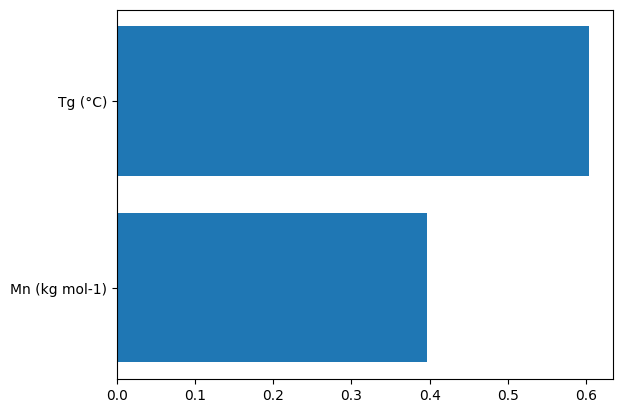

In [12]:
x = x_train.columns 
y = treeb.feature_importances_ #特徴量の重要度

print(y)
plt.barh(x, y)
plt.show()

### 決定木の描画
続いて、graphvizを用いて樹形図を作成しています。（graphvizはローカル環境で構築する場合にはエラーが発生しやすいアプリケーションとなっていますので、各種のガイドを見ながら留意してセットしてください）

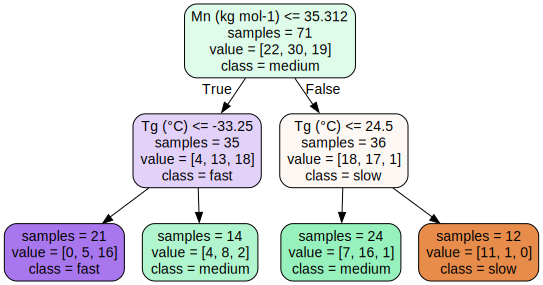

In [13]:
import graphviz
from sklearn.tree import export_graphviz

tree_g = export_graphviz(treeb, 
                      filled=True, 
                      rounded=True,
                      impurity = False, 
                      class_names=['slow','medium','fast'],
                      feature_names=['Mn (kg mol-1)','Tg (°C)'],
                      out_file=None) 


graph = pydotplus.graph_from_dot_data(tree_g)
graph.write_png('output/tree4.png')
graph = graphviz.Source(tree_g) 
graph

### モデル評価
モデル評価を'confusion_matrix()'関数で出力しています。

In [14]:
# model evaluation
print('Number of samples: ' + str(df_train.index.size))
print('Accuracy score - full training set: %.3f' % fitb.score(x_train,y_train))
y_pred = treeb.predict(x_train)
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)

print(conf_mat)

Number of samples: 71
Accuracy score - full training set: 0.718
[[11 11  0]
 [ 1 24  5]
 [ 0  3 16]]


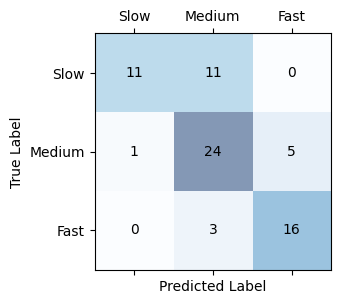

In [15]:
fig, ax = plt.subplots(figsize=(3.5,3.5))

ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=.5)

ax.set_xticklabels(['','Slow', 'Medium' ,'Fast'])
ax.set_yticklabels(['','Slow', 'Medium' ,'Fast'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
        
plt.tight_layout()

### クロスバリデーションによるモデルの精度
cvを10分割としてクロスバリデーションによる精度の平均値を求めます。（約0.62前後となるかと思います）

In [16]:
# cross-fold validation
treep = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1)
scores = cross_val_score(estimator=treep, X=x_train, y=y_train, cv=10)

#print(scores)
print('CV Accuracy Score: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV Accuracy Score: 0.620 +/- 0.192


### 外れ値の検証
ここでは不正解であったデータについて出力しています。

In [17]:
y_pred = treeb.predict(x_train)
correct = (y_pred != y_train.values)
df_incorrect = df_train[correct]
print(df_incorrect)

        Mn (kg mol-1)  Tg (°C)  bio_rank_num3
Number                                       
78          38.000000     80.0            2.0
79          31.250000    133.0            1.0
11          63.000000    -36.0            1.0
76          20.000000     78.0            1.0
0           66.800000    -32.0            1.0
2           10.100000    -41.0            2.0
5           57.700000    -44.0            1.0
6           49.700000    -28.0            1.0
7            9.400000    -31.0            1.0
8           44.300000    -16.0            1.0
12          81.000000    -32.0            1.0
38          30.000000    -41.0            2.0
46          92.000000    -60.0            3.0
63          21.000000    -60.0            2.0
65          24.000000    -66.0            2.0
69           6.900000    -43.9            2.0
96          33.333333     65.0            3.0
97          33.333333     65.0            3.0
88          40.000000   -100.0            1.0
94          18.000000    174.0    

### 決定木における判別境界の作図

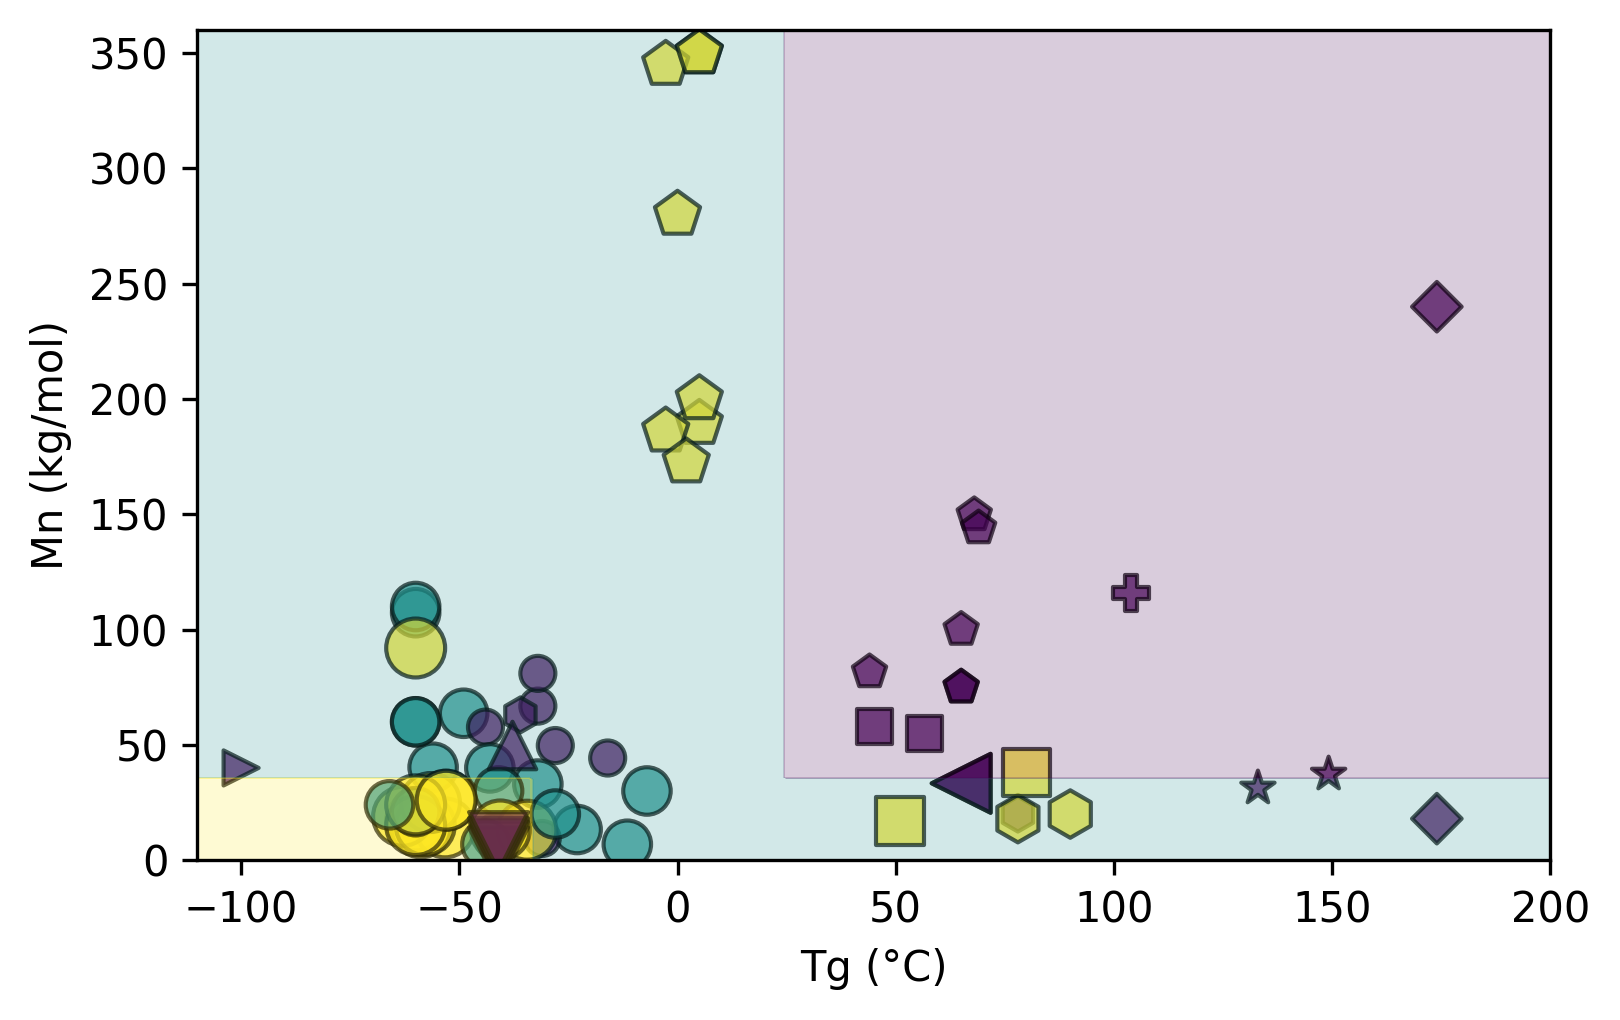

In [18]:
# plot decision regions
plt.figure(figsize=(5.5,3.5),dpi=300)
rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['Mn (kg mol-1)','Tg (°C)','bio_rank_num3','color_cat3']
df_train = df_all.loc[rows,cols]

#display(df_train)
# linear polyester
Y = df_train.loc[polyester_linearb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_linearb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_linearb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_linearb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='o')

# branched polyester
Y = df_train.loc[polyester_branchedb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_branchedb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_branchedb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_branchedb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='p')

# cyclic polyester
Y = df_train.loc[polyester_cyclicb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_cyclicb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_cyclicb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_cyclicb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='h')

# polyamide
Y = df_train.loc[polyamideb,'Mn (kg mol-1)'].values
X = df_train.loc[polyamideb,'Tg (°C)'].values
plt_colors = df_train.loc[polyamideb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyamideb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='s')

# polycarbonate
Y = df_train.loc[polycarbonateb,'Mn (kg mol-1)'].values
X = df_train.loc[polycarbonateb,'Tg (°C)'].values
plt_colors = df_train.loc[polycarbonateb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polycarbonateb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='*')

# polyether
Y = df_train.loc[polyetherb,'Mn (kg mol-1)'].values
X = df_train.loc[polyetherb,'Tg (°C)'].values
plt_colors = df_train.loc[polyetherb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyetherb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='v')

# polyol
Y = df_train.loc[polyolb,'Mn (kg mol-1)'].values
X = df_train.loc[polyolb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='<')

# polyolefin
Y = df_train.loc[polyolefinb,'Mn (kg mol-1)'].values
X = df_train.loc[polyolefinb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolefinb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolefinb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='>')

# polyurethane
Y = df_train.loc[polyurethaneb,'Mn (kg mol-1)'].values
X = df_train.loc[polyurethaneb,'Tg (°C)'].values
plt_colors = df_train.loc[polyurethaneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyurethaneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='^')

# vinylpyrrolidone
Y = df_train.loc[vinylpyrrolidoneb,'Mn (kg mol-1)'].values
X = df_train.loc[vinylpyrrolidoneb,'Tg (°C)'].values
plt_colors = df_train.loc[vinylpyrrolidoneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[vinylpyrrolidoneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='D')

# polystyrene
Y = df_train.loc[polystyreneb,'Mn (kg mol-1)'].values
X = df_train.loc[polystyreneb,'Tg (°C)'].values
plt_colors = df_train.loc[polystyreneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polystyreneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='P')

# pvc
Y = df_train.loc[pvcb,'Mn (kg mol-1)'].values
X = df_train.loc[pvcb,'Tg (°C)'].values
plt_colors = df_train.loc[pvcb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[pvcb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='d')

# plot errors
#Y = df_incorrect['Mn (kg/mol)']
#X = df_incorrect['Tg (°C)']
#plt.scatter(X,Y,c='r',linewidths=1,marker='x')

# plot decision map
xx, yy, = np.meshgrid(np.arange(-110,201,1),np.arange(0,361.0,1.0))
z = fitb.predict(np.array([yy.ravel(),xx.ravel()]).T)
z = z.reshape(xx.shape)
#print(z)
cmap = mpl.colors.ListedColormap(((0.267004, 0.004874, 0.329415),(0.128729, 0.563265, 0.551229),
                                       (0.993248, 0.906157, 0.143936)))
plt.contourf(xx,yy,z,alpha=.2,cmap=cmap)

plt.ylabel('Mn (kg/mol)')
plt.xlabel('Tg (°C)')
plt.ylim(0,360.0)
plt.xlim(-110,200)

plt.tight_layout()
plt.savefig(fname='output/Fig4_122319.png',dpi=300,transparent=True,pad_inches=0.0)
plt.show()

### エラー値の表示

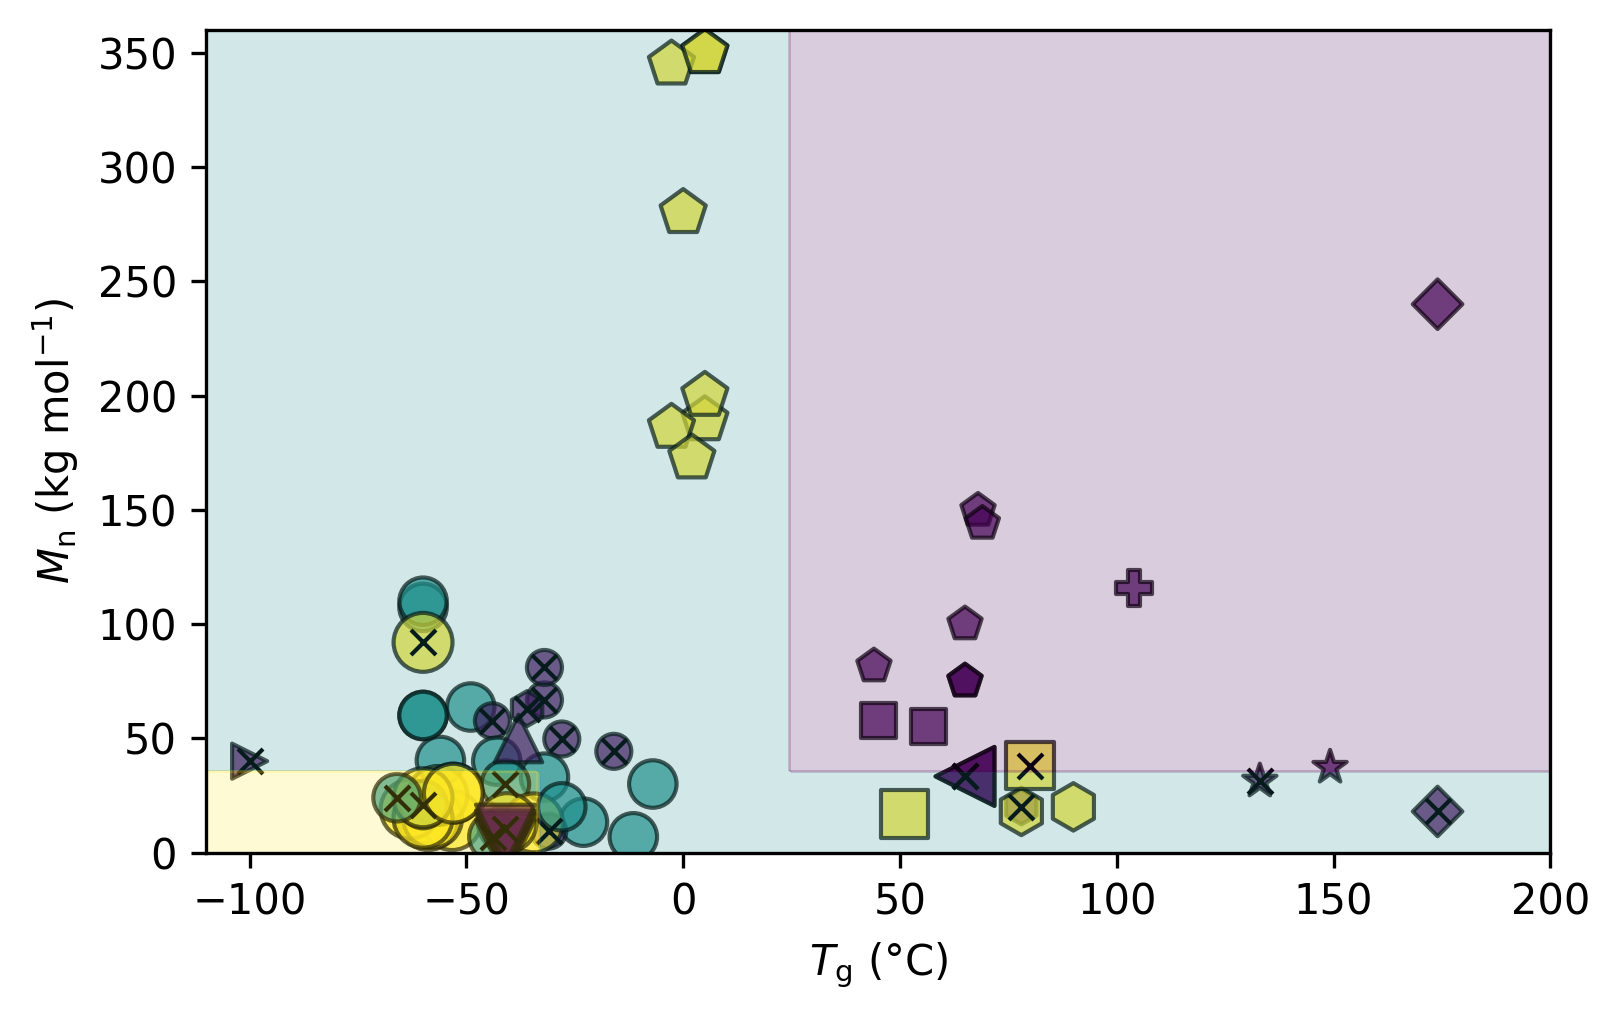

In [19]:
# plot decision regions
plt.figure(figsize=(5.5,3.5),dpi=300)
rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['Mn (kg mol-1)','Tg (°C)','bio_rank_num3','color_cat3']
df_train = df_all.loc[rows,cols]


# linear polyester
Y = df_train.loc[polyester_linearb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_linearb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_linearb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_linearb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='o')

# branched polyester
Y = df_train.loc[polyester_branchedb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_branchedb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_branchedb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_branchedb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='p')

# cyclic polyester
Y = df_train.loc[polyester_cyclicb,'Mn (kg mol-1)'].values
X = df_train.loc[polyester_cyclicb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_cyclicb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_cyclicb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='h')

# polyamide
Y = df_train.loc[polyamideb,'Mn (kg mol-1)'].values
X = df_train.loc[polyamideb,'Tg (°C)'].values
plt_colors = df_train.loc[polyamideb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyamideb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='s')

# polycarbonate
Y = df_train.loc[polycarbonateb,'Mn (kg mol-1)'].values
X = df_train.loc[polycarbonateb,'Tg (°C)'].values
plt_colors = df_train.loc[polycarbonateb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polycarbonateb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='*')

# polyether
Y = df_train.loc[polyetherb,'Mn (kg mol-1)'].values
X = df_train.loc[polyetherb,'Tg (°C)'].values
plt_colors = df_train.loc[polyetherb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyetherb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='v')

# polyol
Y = df_train.loc[polyolb,'Mn (kg mol-1)'].values
X = df_train.loc[polyolb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='<')

# polyolefin
Y = df_train.loc[polyolefinb,'Mn (kg mol-1)'].values
X = df_train.loc[polyolefinb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolefinb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolefinb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='>')

# polyurethane
Y = df_train.loc[polyurethaneb,'Mn (kg mol-1)'].values
X = df_train.loc[polyurethaneb,'Tg (°C)'].values
plt_colors = df_train.loc[polyurethaneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyurethaneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='^')

# vinylpyrrolidone
Y = df_train.loc[vinylpyrrolidoneb,'Mn (kg mol-1)'].values
X = df_train.loc[vinylpyrrolidoneb,'Tg (°C)'].values
plt_colors = df_train.loc[vinylpyrrolidoneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[vinylpyrrolidoneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='D')

# polystyrene
Y = df_train.loc[polystyreneb,'Mn (kg mol-1)'].values
X = df_train.loc[polystyreneb,'Tg (°C)'].values
plt_colors = df_train.loc[polystyreneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polystyreneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='P')

# pvc
Y = df_train.loc[pvcb,'Mn (kg mol-1)'].values
X = df_train.loc[pvcb,'Tg (°C)'].values
plt_colors = df_train.loc[pvcb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[pvcb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='d')

# plot errors
Y = df_incorrect['Mn (kg mol-1)']
X = df_incorrect['Tg (°C)']
plt.scatter(X,Y,c='black',linewidths=1,marker='x')

# plot decision map
xx, yy, = np.meshgrid(np.arange(-110,201,1),np.arange(0,361.0,1.0))
z = fitb.predict(np.array([yy.ravel(),xx.ravel()]).T)
z = z.reshape(xx.shape)
#print(z)
cmap = mpl.colors.ListedColormap(((0.267004, 0.004874, 0.329415),(0.128729, 0.563265, 0.551229),
                                       (0.993248, 0.906157, 0.143936)))
plt.contourf(xx,yy,z,alpha=.2,cmap=cmap)

plt.ylabel('$\mathit{M}\mathdefault{_{n}}$ $\mathdefault{(kg}$ $\mathdefault{mol^{-1})}$')
plt.xlabel('$\mathit{T}\mathdefault{_{g}}$ $\mathdefault{(°C)}$')
plt.ylim(0,360.0)
plt.xlim(-110,200)

plt.tight_layout()
plt.savefig(fname='output/Fig4_122319.png',dpi=300,transparent=True,pad_inches=0.0)
plt.show()

## 3.決定木モデルの検討-2

上記のガラス転移温度（Tg）、数平均分子量（Mn）に加えて'LogP(SA)-1 (Å-2)'および'enthalpy (J g-1)'を加えて決定木による分類モデルを検討しています。変数を増やしている以外は、コードブロックの構成の違いはありません。

### データセットの再構成

In [20]:
#try 3 cat equal classification trees bio - all colums - no cryst (corr w/ enth)
rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['LogP(SA)-1 (Å-2)','Mn (kg mol-1)','Tg (°C)','enthalpy (J g-1)','bio_rank_num3']

df_train = df_all.loc[rows,cols]

### 欠損値の処理

In [21]:
# remove NANs
df_train = df_train.dropna()
df_train

,LogP(SA)-1 (Å-2),Mn (kg mol-1),Tg (°C),enthalpy (J g-1),bio_rank_num3
Number,,,,,
83,0.004500,16.900000,51.0,80.50,2.0
85,0.004500,58.000000,45.1,82.31,1.0
86,0.004100,55.000000,56.5,74.98,1.0
79,0.021300,31.250000,133.0,44.30,1.0
82,0.021300,37.290323,149.2,39.00,1.0
...,...,...,...,...,...
96,-0.008900,33.333333,65.0,88.55,3.0
97,-0.008900,33.333333,65.0,88.55,3.0
88,0.023600,40.000000,-100.0,202.17,1.0


### データ分割

In [22]:
# training set
x_train = df_train[cols[:-1]]
y_train = df_train['bio_rank_num3']

### 機械学習モデル

max_depthの引数を2から3へ変更し樹形を3段階とします。

In [23]:
#train
treeb = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
fitb = treeb.fit(x_train,y_train)

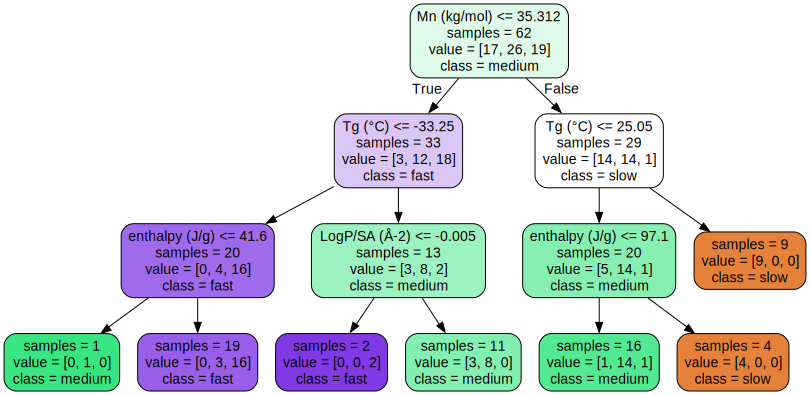

In [24]:
tree_g = tree.export_graphviz(fitb, feature_names=['LogP/SA (Å-2)','Mn (kg/mol)','Tg (°C)','enthalpy (J/g)']
                              ,class_names=['slow','medium','fast'],
                              filled = True,
                              impurity=False,
                              rounded=True)

graph = pydotplus.graph_from_dot_data(tree_g)
graph.write_png('output/tree5.png')
graph = graphviz.Source(tree_g) 
graph

### モデル評価

Number of samples: 62
Accuracy score - full training set: 0.871


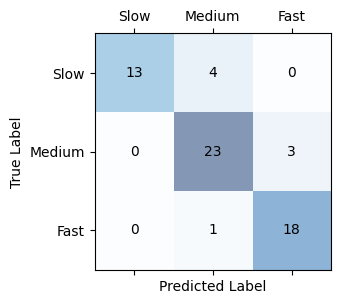

In [25]:
# model evaluation
print('Number of samples: ' + str(df_train.index.size))
print('Accuracy score - full training set: %.3f' % fitb.score(x_train,y_train))
y_pred = treeb.predict(x_train)
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)

#print(conf_mat)
fig, ax = plt.subplots(figsize=(3.5,3.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=.5)
ax.set_xticklabels(['','Slow', 'Medium' ,'Fast'])
ax.set_yticklabels(['','Slow', 'Medium' ,'Fast'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
plt.tight_layout()

### クロスバリデーションによる評価

cvを10分割としてクロスバリデーションによる精度の平均値を求めます。（約0.69前後となるかと思います）

In [26]:
# cross-fold validation
treep = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
scores = cross_val_score(estimator=treep, X=x_train, y=y_train, cv=10)

print(scores)
print('CV Accuracy Score: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

[0.85714286 0.71428571 1.         0.83333333 0.66666667 0.66666667
 0.5        0.33333333 0.66666667 0.66666667]
CV Accuracy Score: 0.690 +/- 0.176


### 外れ値の検証

In [27]:
y_pred = treeb.predict(x_train)
correct = (y_pred != y_train.values)
df_incorrect = df_train[correct]
print(df_incorrect)

        LogP(SA)-1 (Å-2)  Mn (kg mol-1)  Tg (°C)  enthalpy (J g-1)   
Number                                                               
79               0.02130          31.25    133.0             44.30  \
76               0.00807          20.00     78.0             26.70   
2                0.00761          10.10    -41.0             78.00   
5                0.01195          57.70    -44.0             76.00   
7                0.01397           9.40    -31.0             91.00   
46               0.00960          92.00    -60.0             83.70   
63               0.01020          21.00    -60.0             88.00   
69               0.00300           6.90    -43.9             78.75   

        bio_rank_num3  
Number                 
79                1.0  
76                1.0  
2                 2.0  
5                 1.0  
7                 1.0  
46                3.0  
63                2.0  
69                2.0  


## 4.サポートベクタマシーンの検討-3

次に、溶解度（'LogP(SA)-1 (Å-2)とガラス転移温度（Tg）によるサポートベクターによる分類検討を行っています。


### データセットの再構築

In [28]:
#try 3 cat equal regression bio - LogPSA and Tg
rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['LogP(SA)-1 (Å-2)','Tg (°C)','bio_rank_num3']
df_train = df_all.loc[rows,cols]

### 欠損値の処理

In [29]:
# remove NANs
df_train = df_train.dropna()
df_train

,LogP(SA)-1 (Å-2),Tg (°C),bio_rank_num3
Number,,,
78,-0.003700,80.0,2.0
83,0.004500,51.0,2.0
85,0.004500,45.1,1.0
86,0.004100,56.5,1.0
79,0.021300,133.0,1.0
...,...,...,...
73,0.005950,-38.0,2.0
94,-0.001710,174.0,1.0
95,-0.001710,174.0,1.0


### データ分割

In [30]:
# training set
x_train = df_train[cols[:-1]]
y_train = df_train['bio_rank_num3'].values

### 機械学習モデル
サポートベクターマシーンによるモデル化については、データを標準化することが推奨されています。`StandardScaler()`関数から標準化する手続きをとる以外は、上記の決定木とは変わりありません。

In [31]:
#standardization
std_sc = StandardScaler()
x_train_std = std_sc.fit_transform(x_train)

#train
svm = SVC(kernel='rbf', random_state=1, gamma=.2, C=10.0)
fitb = svm.fit(x_train_std,y_train)

###　モデル評価

In [32]:
# model evaluation
print('Number of samples: ' + str(df_train.index.size))
print('Accuracy score - full training set: %.3f' % fitb.score(x_train_std,y_train))

y_pred = fitb.predict(x_train_std)

conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred)

print(conf_mat)

Number of samples: 74
Accuracy score - full training set: 0.730
[[21  4  0]
 [ 5 19  6]
 [ 0  5 14]]


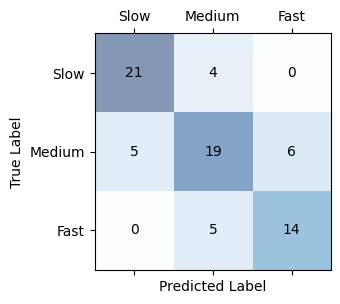

In [33]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=.5)
ax.set_xticklabels(['','Slow', 'Medium' ,'Fast'])
ax.set_yticklabels(['','Slow', 'Medium' ,'Fast'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
plt.tight_layout()

### クロスバリデーションによる評価

cvを10分割としてクロスバリデーションによる精度の平均値を求めます。（約0.58前後となるかと思います）

In [34]:
# cross-fold validation
svmp = SVC(kernel='rbf', random_state=1, gamma=.2, C=10.0)
scores = cross_val_score(estimator=svmp, X=x_train_std, y=y_train, cv=10)
print(scores)
print('CV Accuracy Score: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

[0.5        0.875      0.75       0.375      0.42857143 0.42857143
 0.71428571 0.57142857 0.71428571 0.42857143]
CV Accuracy Score: 0.579 +/- 0.164


### サポートベクターにおける判別境界の作図

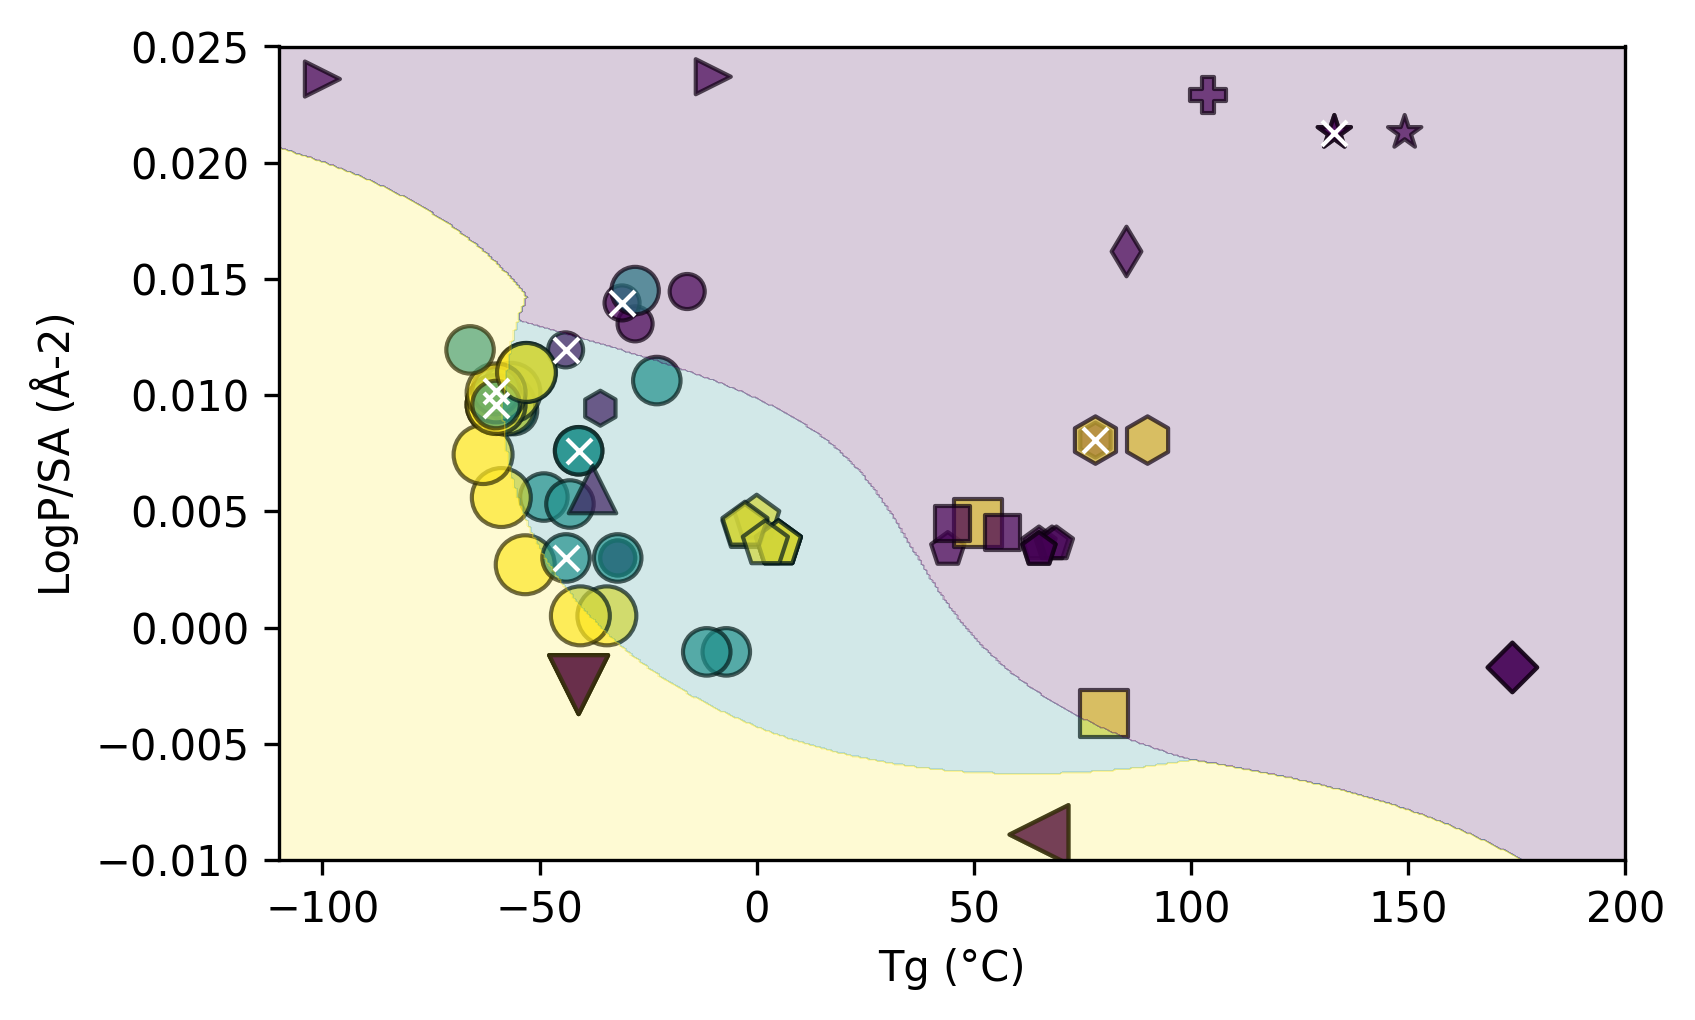

In [35]:
# plot decision regions
plt.figure(figsize=(5.75,3.5),dpi=300)
rows = (polyamideb + polycarbonateb + polyester_branchedb + polyester_cyclicb + polyester_linearb + polyetherb +
       polyolb + polyolefinb + polyurethaneb + vinylpyrrolidoneb + polystyreneb + pvcb)
cols = ['LogP(SA)-1 (Å-2)','Tg (°C)','bio_rank_num3','color_cat3']

df_train = df_all.loc[rows,cols]

#display(df_train)
# linear polyester
Y = df_train.loc[polyester_linearb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyester_linearb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_linearb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_linearb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='o')

# branched polyester
Y = df_train.loc[polyester_branchedb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyester_branchedb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_branchedb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_branchedb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='p')

# cyclic polyester
Y = df_train.loc[polyester_cyclicb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyester_cyclicb,'Tg (°C)'].values
plt_colors = df_train.loc[polyester_cyclicb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyester_cyclicb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='h')

# polyamide
Y = df_train.loc[polyamideb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyamideb,'Tg (°C)'].values
plt_colors = df_train.loc[polyamideb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyamideb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black', marker='s')

# polycarbonate
Y = df_train.loc[polycarbonateb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polycarbonateb,'Tg (°C)'].values
plt_colors = df_train.loc[polycarbonateb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polycarbonateb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='*')

# polyether
Y = df_train.loc[polyetherb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyetherb,'Tg (°C)'].values
plt_colors = df_train.loc[polyetherb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyetherb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='v')
# polyol
Y = df_train.loc[polyolb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyolb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='<')

# polyolefin
Y = df_train.loc[polyolefinb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyolefinb,'Tg (°C)'].values
plt_colors = df_train.loc[polyolefinb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyolefinb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='>')

# polyurethane
Y = df_train.loc[polyurethaneb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polyurethaneb,'Tg (°C)'].values
plt_colors = df_train.loc[polyurethaneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polyurethaneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='^')

# vinylpyrrolidone
Y = df_train.loc[vinylpyrrolidoneb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[vinylpyrrolidoneb,'Tg (°C)'].values
plt_colors = df_train.loc[vinylpyrrolidoneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[vinylpyrrolidoneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='D')

# polystyrene
Y = df_train.loc[polystyreneb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[polystyreneb,'Tg (°C)'].values
plt_colors = df_train.loc[polystyreneb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[polystyreneb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='P')

# pvc
Y = df_train.loc[pvcb,'LogP(SA)-1 (Å-2)'].values
X = df_train.loc[pvcb,'Tg (°C)'].values
plt_colors = df_train.loc[pvcb,'color_cat3'].tolist()
plt_areas = (np.array(df_train.loc[pvcb,'bio_rank_num3'].values) + 1)**1.5 * 25 
plt.scatter(X,Y,c=plt_colors,s=plt_areas,alpha=.7,linewidths=1,edgecolor='black',marker='d')

# plot decision map
# meshgrid is X(Tg),Y(LogPSA)
xx, yy = np.meshgrid(np.arange(-3.5,3.51,.01),np.arange(-3.5,3.51,.01))
#print([std_sc.transform(np.arange(-75,200,5)),std_sc.transform(np.arange(-.01,.025,.001))])
#xx_std, yy_std = np.meshgrid(std_sc.transform(np.arange(-75,200,5)),std_sc.transform(np.arange(-.01,.025,.001)))
z = fitb.predict(np.array([yy.ravel(),xx.ravel()]).T)
z = z.reshape(xx.shape)
test_df = pd.DataFrame()
test_df['LogPSA'] = np.arange(-3.5,3.51,.01)
test_df['Tg'] = np.arange(-3.5,3.51,.01)
test_df = std_sc.inverse_transform(test_df)
#print(test_df[:,0])
#print(z)
cmap = mpl.colors.ListedColormap(((0.267004, 0.004874, 0.329415),(0.128729, 0.563265, 0.551229),
                                       (0.993248, 0.906157, 0.143936)))
plt.contourf(test_df[:,1],test_df[:,0],z,alpha=.2,cmap=cmap)

# plot errors
Y = df_incorrect['LogP(SA)-1 (Å-2)']
X = df_incorrect['Tg (°C)']
plt.scatter(X,Y,c='white',linewidths=1,marker='x')

plt.ylabel('LogP/SA (Å-2)')
plt.xlabel('Tg (°C)')
plt.ylim(-.01,.025)
plt.xlim(-110,200)

plt.tight_layout()
plt.savefig(fname='output/Fig5_122319.png',dpi=300,transparent=True,pad_inches=0.0)
plt.show()